In [26]:
# Imported necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load dataset (replace with your actual dataset)
file_path = 'bathsoaphousehold.csv'  
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Step 1: Encode categorical variables (e.g., SEX, SEC, EDU)
label_enc = LabelEncoder()
df['SEX'] = label_enc.fit_transform(df['SEX'])  # Female = 0, Male = 1
df['SEC'] = label_enc.fit_transform(df['SEC'])  # e.g., Upper = 0, Lower = 2, etc.
df['EDU'] = label_enc.fit_transform(df['EDU'])  # e.g., High School = 0, College = 1, etc.

# Step 2: Select behavioral features for clustering
features = [
    "Brand Runs", "Total Volume", "No. of  Trans", "Value",
    "Trans / Brand Runs", "Vol/Tran", "Price(avg)", 
    "Pur Vol No Promo - %", "Pur Vol Promo 6 %", "Pur Vol Other Promo %"
]
X = df[features]

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


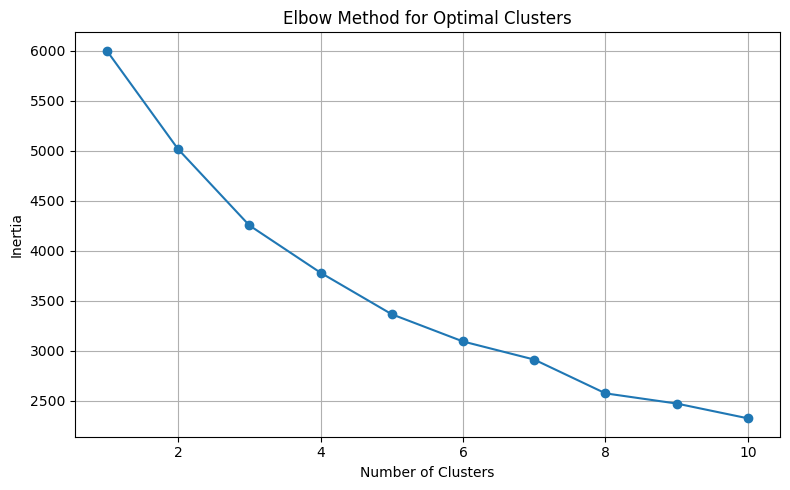

In [19]:
# Step 4: Elbow Method to determine the optimal number of clusters (K)
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


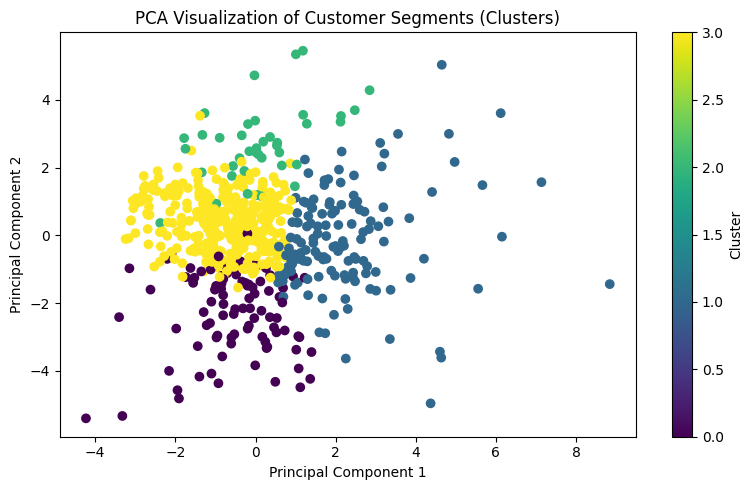

In [20]:
# Step 5: Apply KMeans clustering using the optimal K (Assume K=4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualize the clusters using PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("PCA Visualization of Customer Segments (Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [21]:
# Step 7: Examine cluster characteristics (e.g., mean values of features per cluster)
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


         Brand Runs  Total Volume  No. of  Trans        Value  \
Cluster                                                         
0         19.663158   8814.052632      31.652632  1080.741579   
1         24.688889  21215.518519      49.429630  2449.513704   
2          3.075000  16363.750000      25.100000  1212.700000   
3         12.506061   8463.278788      24.266667   971.421394   

         Trans / Brand Runs    Vol/Tran  Price(avg)  Pur Vol No Promo - %  \
Cluster                                                                     
0                  1.737684  307.116526   12.707579              0.702211   
1                  2.218519  516.873556   11.872000              0.929944   
2                  9.983750  681.893750    7.750250              0.963822   
3                  2.141636  372.124182   12.063273              0.960605   

         Pur Vol Promo 6 %  Pur Vol Other Promo %  
Cluster                                            
0                 0.205417               0

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Price(avg)', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')


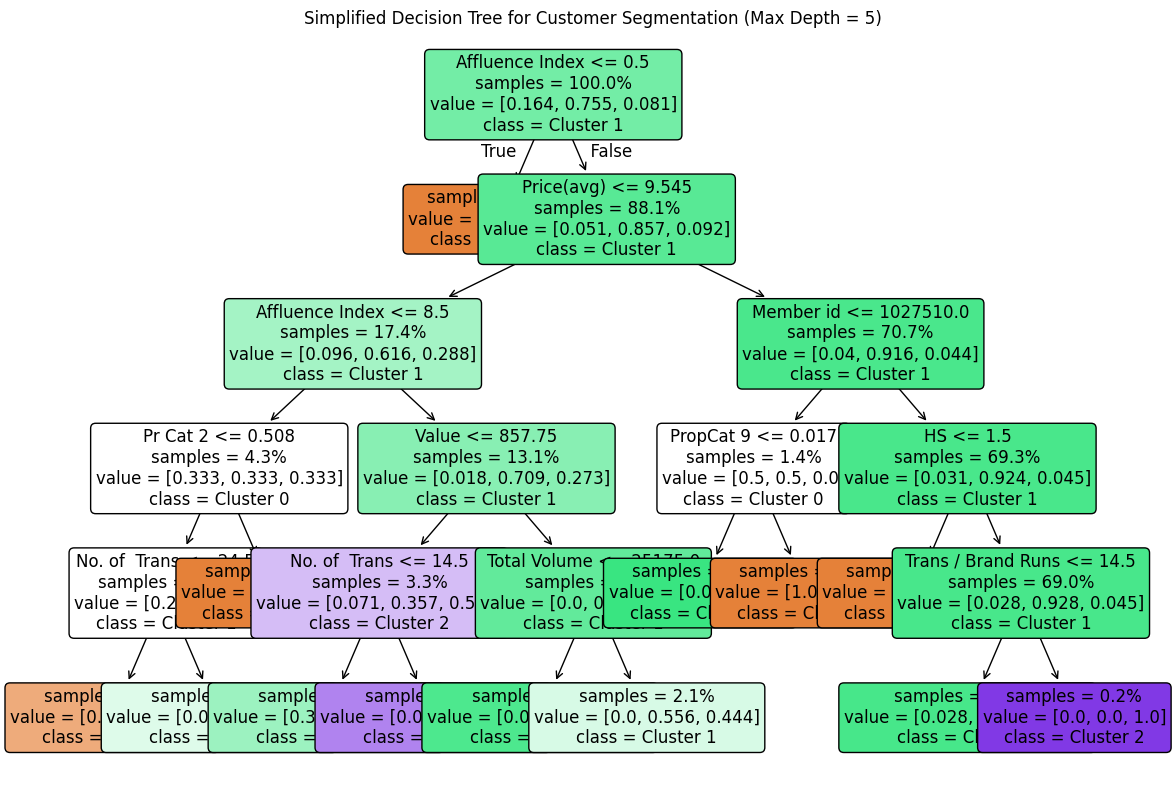

In [34]:

# Check the available columns in the training set (X_train)
print(X_train.columns)  # This will give you a list of features used in training

# Create a dynamic feature list based on the columns in X_train
selected_features = list(X_train.columns)  # This dynamically selects all the columns from the training set

# Train the Decision Tree with a maximum depth of 5
classifier = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
classifier.fit(X_train, y_train)

# Predict clusters for the test set
y_pred = classifier.predict(X_test)

# Step 2: Visualize the simplified decision tree
plt.figure(figsize=(12, 8))

# Plot the tree, ensuring the features list matches the columns of X_train
plot_tree(
    classifier,
    filled=True,
    feature_names=selected_features,  # Use the dynamically selected feature names
    class_names=[f'Cluster {i}' for i in range(4)],  # Adjust class names according to the number of clusters
    fontsize=12,
    max_depth=5,  # Limit tree depth for clarity
    proportion=True,  # Show proportions instead of counts to reduce clutter
    impurity=False,  # Remove the impurity values
    rounded=True  # Rounded corners for a cleaner look
)

# Add title and adjust layout
plt.title("Simplified Decision Tree for Customer Segmentation (Max Depth = 5)")
plt.tight_layout()
plt.show()



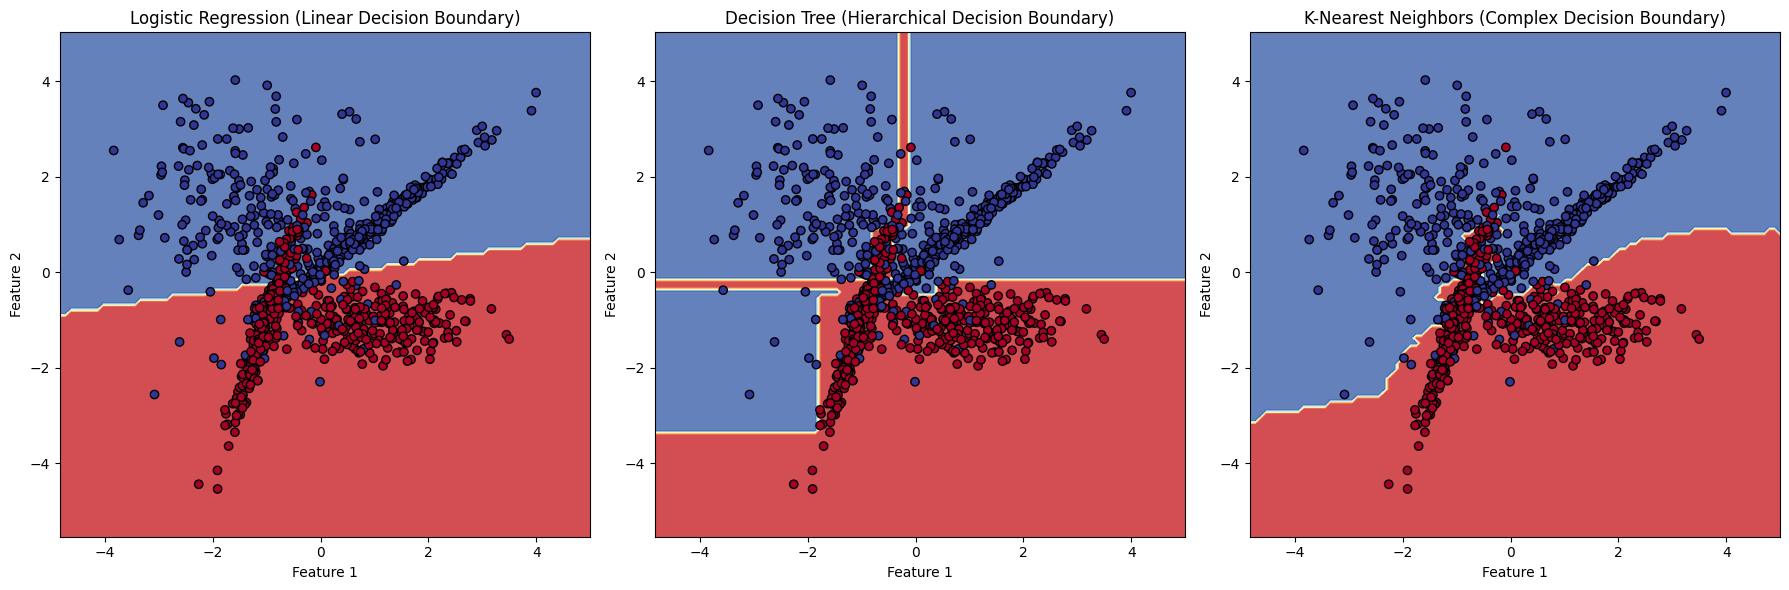

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data with 2 features (to make it easy to visualize)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create models
log_reg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train models
log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the decision boundary for each model
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_tree = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting the decision boundaries for each model
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
ax[0].contourf(xx, yy, Z_log_reg, alpha=0.8, cmap=plt.cm.RdYlBu)
ax[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
ax[0].set_title("Logistic Regression (Linear Decision Boundary)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Decision Tree
ax[1].contourf(xx, yy, Z_tree, alpha=0.8, cmap=plt.cm.RdYlBu)
ax[1].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
ax[1].set_title("Decision Tree (Hierarchical Decision Boundary)")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

# KNN
ax[2].contourf(xx, yy, Z_knn, alpha=0.8, cmap=plt.cm.RdYlBu)
ax[2].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
ax[2].set_title("K-Nearest Neighbors (Complex Decision Boundary)")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")

# Tight layout for clear visualization
plt.tight_layout()
plt.show()



In [33]:
# Specify the column you want to predict, for example, 'CS' (Customer Segment or Score)
target_column = 'CS'

# Ensure the target column exists in the dataset
if target_column not in df.columns:
    print(f"Error: '{target_column}' column not found in the dataset.")
else:
    # Split the dataset into features (X) and target (y)
    X = df.drop(columns=[target_column])  # Features (exclude target column)
    y = df[target_column]  # Target variable

    # Split the dataset into training and test sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Save the training and test datasets to CSV
    X_train.to_csv("training_features.csv", index=False)
    X_test.to_csv("test_features.csv", index=False)
    y_train.to_csv("training_target.csv", index=False)
    y_test.to_csv("test_target.csv", index=False)

    print("Datasets have been successfully split and saved.")


Datasets have been successfully split and saved.
